<p><img alt="DataOwl" width=150 src="http://gwsolutions.cl/Images/dataowl.png", align="left", hspace=0, vspace=5></p>

<h1 align="center">Límite, continuidad y derivadas</h1>

<h4 align="center">Funciones de una variable</h4>
<pre><div align="center"> La idea de este notebook es que sirva para iniciarse en conceptos 
matemáticos para resolver ecuaciones de una variable y derivadas.</div>

## Cálculo


El Cálculo es una de las áreas aplicadas del Análisis Real y Complejo, cuyo objetivo es entender las propiedades de objetos que toman valores en estos conjuntos, como las sucesiones y funciones.

En modelamiento numérico, se puede utilizar la teoría de Cálculo de forma retroactiva con los métodos de visualización, ya que, por un lado, el hecho de conocer el comportamiento de un modelo debe verse ratificado por estimaciones numéricas y gráficos mientras que, por otro lado, un buen uso de herramientas gráficas podría permitir aproximarnos a características del modelo que no conocemos <i>a priori</i>.

Para comenzar, introducimos el concepto de **límite** para luego definir **continuidad** de una función. Finalmente, construimos la noción de **derivada numérica**, y vemos qué ventajas y limitaciones presenta.

In [1]:
# Importando las librerías
%matplotlib notebook
import experimento3 as ex
import numpy as np
import matplotlib.pyplot as plt


## 1. Límite

### 1.1 Límite de una sucesión

Habíamos visto que Python permite definir sucesiones, ya sea de forma explícita o por recurrencia. En general, una **sucesión** es un conjunto de valores $a_0,\ a_1,\ldots\ a_n,\ldots$ que se puede denotar por $\{a_n\}_{n\in\mathbb{N}}$. En la práctica, resulta interesante estudiar el comportamiento de las sucesiones en rangos de valores $n$ acotados, o bien su **comportamiento asintótico**, si es que lo tiene. Se dice que una sucesión $\{a_n\}_{n\in\mathbb{N}}$ posee límite $L\in\mathbb{R}$ si

$$(\forall\ \varepsilon>0)(\exists\ n_0\in\mathbb{N})(\forall\ n\ge n_0)\ \ |a_n-L|<\varepsilon$$

En caso de que este valor $L$ exista, es único, y se denota $$\displaystyle\lim_{n\rightarrow\infty}a_n=L$$

Veremos qué significa esto, gráficamente.


In [18]:
# Veremos cómo se comportan la sucesiones definidas en el módulo experimento3

n = np.arange(0, 51)

suc1 = ex.sucesion(n)

# Aquí usamos la versión alternativa de la función raiz2(n), que es mucho más rápida pues no es recursiva
suc2 = []

for i in n2:
    suc2.append(ex.raiz2b(i))

suc2 = np.asarray(suc2)

<IPython.core.display.Javascript object>


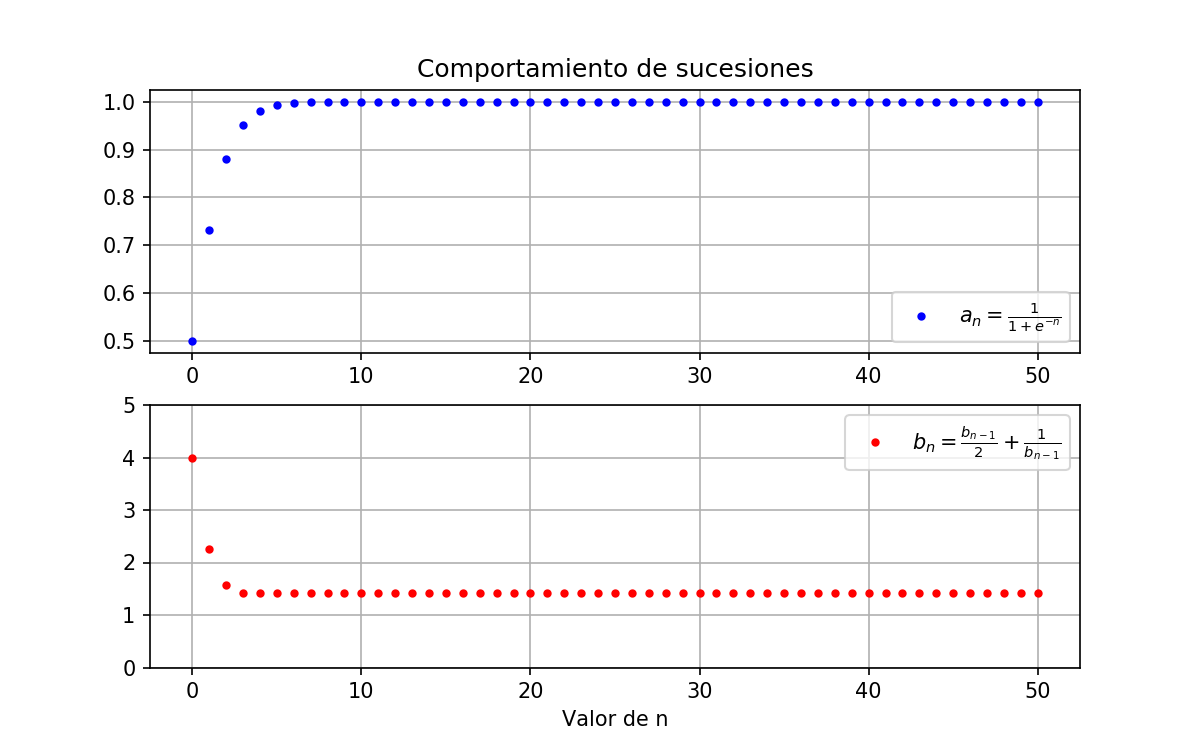

In [19]:
fig1, ax1 = plt.subplots(2, 1, figsize=(8, 5))

# Notar que el atributo label soporta notación de LaTeX (para ver fórmulas más bonitas)
# Averiguar qué hace cada instrucción escrita (set_title, set_xticks, etc.)

# Gráfico de arriba
ax1[0].plot(n, suc1, linestyle='', marker='.', color='blue', label='$a_n=\\frac{1}{1+e^{-n}}$')
ax1[0].set_title('Comportamiento de sucesiones')
ax1[0].set_xticks(np.arange(0, len(n) + 1, 10))
ax1[0].legend()
ax1[0].grid()

# Gráfico de abajo
ax1[1].plot(n, suc2, linestyle='', marker='.', color='red', label='$b_n=\\frac{b_{n-1}}{2}+\\frac{1}{b_{n-1}}$')
ax1[1].set_ylim([0, 5])
ax1[1].set_xlabel('Valor de n')
ax1[1].set_xticks(np.arange(0, len(n) + 1, 10))
ax1[1].legend()
ax1[1].grid()

plt.show()

<IPython.core.display.Javascript object>


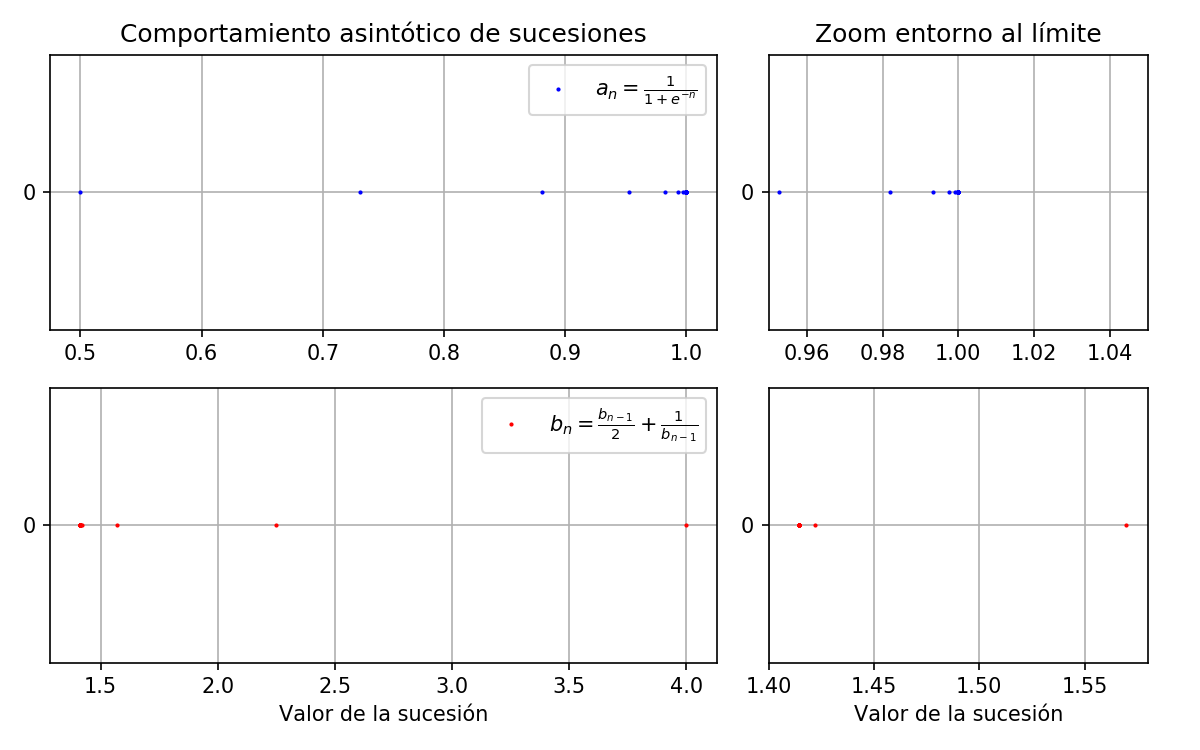

In [20]:
# Graficamos la sucesión pero ahora en el eje x, para ver si encontramos un valor al cual puede tender

fig2 = plt.figure(figsize=(8, 5))
ax2 = [None for _ in range(4)] 

# Gráfico de arriba
ax2[0] = plt.subplot2grid((2, 8), (0, 0), colspan=5, fig=fig2)
ax2[0].plot(suc1, np.zeros(len(suc1)), linestyle='', marker='.', markersize=2, color='blue', label='$a_n=\\frac{1}{1+e^{-n}}$')
ax2[0].set_ylim([-0.01, 0.01])
ax2[0].set_yticks([0])
ax2[0].set_title('Comportamiento asintótico de sucesiones')
ax2[0].legend()
ax2[0].grid()

ax2[1] = plt.subplot2grid((2, 8), (0, 5), colspan=3, fig=fig2)
ax2[1].plot(suc1, np.zeros(len(suc1)), linestyle='', marker='.', markersize=2, color='blue')
ax2[1].set_xlim([0.95, 1.05])
ax2[1].set_ylim([-0.01, 0.01])
ax2[1].set_yticks([0])
ax2[1].set_title('Zoom entorno al límite')
ax2[1].grid()

# Gráfico de abajo
ax2[2] = plt.subplot2grid((2, 8), (1, 0), colspan=5, fig=fig2)
ax2[2].plot(suc2, np.zeros(len(suc2)), linestyle='', marker='.', markersize=2, color='red', label='$b_n=\\frac{b_{n-1}}{2}+\\frac{1}{b_{n-1}}$')
ax2[2].set_ylim([-0.01, 0.01])
ax2[2].set_yticks([0])
ax2[2].set_xlabel('Valor de la sucesión')
ax2[2].legend()
ax2[2].grid()

ax2[3] = plt.subplot2grid((2, 8), (1, 5), colspan=3, fig=fig2)
ax2[3].plot(suc2, np.zeros(len(suc2)), linestyle='', marker='.', markersize=2, color='red')
ax2[3].set_xlim([1.4, 1.58])
ax2[3].set_ylim([-0.01, 0.01])
ax2[3].set_yticks([0])
ax2[3].set_xlabel('Valor de la sucesión')
ax2[3].grid()

fig2.tight_layout()
plt.show()

# Para hacer un zoom en cada sucesión, se puede hacer ax2[k].set_xlim([valor1, valor2]), con k = 1 o 3, para
# que el zoom sea entre valor1 y valor2.

Es posible notar que es sumamente útil poder graficar de una u otra forma las sucesiones, puesto que Python no es capaz de realizar cálculos simbólicos, es decir, evaluar en $n\longrightarrow\infty$. Poder visualizar que la sucesión tiende  a algún valor límite, nos permite suponer que, efectivamente, converge a éste, aun si no sabemos calcularlo (por ejemplo, si no sabemos mucha matemática).

### 1.2 Límite de una función

Del mismo modo en que se puede estudiar las sucesiones, ya sea en valores acotados o a nivel asintótico, es posible estudiar estructuras más generales, como las **funciones**.

Una función $f$ puede verse como una asignación entre dos conjuntos, $f:\ A\longrightarrow B$, dada por $y=f(x)$, en que un elemento $x\in A$ sufre una transformación para convertirse en un elemento $y\in B$. En el caso de las sucesiones, éstas son funciones del estilo $f:\ \mathbb{N}\longrightarrow\mathbb{R}$, en que $a_n=f(n)$. Eso nos permite definirlas en Python como lo hemos estado haciendo.

Decimos que una función $f$ es una **función real** si $f:\ \mathbb{R}\longrightarrow\mathbb{R}$. Desde el punto de vista algebraico, una función posee muchos atributos, como dominio y recorrido, paridad, inyectividad, epiyectividad (o sobreyectividad), invertibilidad, etc. Podemos ver algunos ejemplos de éstos, aunque no constituyen la parte importante de este capítulo. Si tienen interés en averiguar más sobre el significado de estos términos, pueden consutar al profesor o buscar en internet.


Así como las sucesiones, las funciones reales tienen comportamiento interesante en intervalos acotados o a nivel asintótico, con la diferencia de que puede adoptar muchos más valores que una sucesión (aquí entra el concepto de cardinalidad de un conjunto, que no veremos). Es decir, puede ser interesante el comportamiento de una función tanto cuando su variable tiende a infinito, como cuando ésta tiende a un valor $x_0$ específico.

Decimos que una función $f$ tiene límite $L\in\mathbb{R}$ cuando $x$ tiende a $x_0$ si

$$(\forall\ \varepsilon>0)(\exists\ \delta>0)\ |x-x_0|<\delta\ \Longrightarrow\ |f(x)-L|<\varepsilon$$

En caso de que este valor $L$ exista, es único, y se denota $$\displaystyle\lim_{x\rightarrow x_0}f(x)=L$$

Del mismo modo, decimos que una función $f$ tiene límite $L\in\mathbb{R}$ cuando $x$ tiende a infinito si

$$(\forall\ \varepsilon>0)(\exists\ M>0)(\forall\ x>M)\ |f(x)-L|<\varepsilon$$

En caso de que este valor $L$ exista, es único, y se denota $$\displaystyle\lim_{x\rightarrow\infty}f(x)=L$$

Veremos algunos ejemplos en que se puede reconocer la existencia de un límite.


In [40]:
x = np.linspace(0.01, 10, 1000) # Notar que aquí evitamos incluir x = 0
x2 = np.linspace(-10, 10, 1001) # Escojemos que sean 1001 puntos, porque nos aseguramos de que 0 esté en el arreglo
                                # y en la definición de la función escogimos que, si x=0, nos retornara el valor 1
                                # Si el límite existe en x=0, la función debería ser coherente cerca x=0

# Como yo ya definí la función sinc y ésta tiene una excepción (un operador condicional if), no puedo
# llegar y evaluar sinc(x) o sinc(x2). Tengo que hacer la evaluación punto a punto con un ciclo for

f = []
f2 = []

for i in x:
    f.append(ex.sinc(i))

for j in x2:
    f2.append(ex.sinc(j))

f = np.asarray(f)
f2 = np.asarray(f2)


<IPython.core.display.Javascript object>


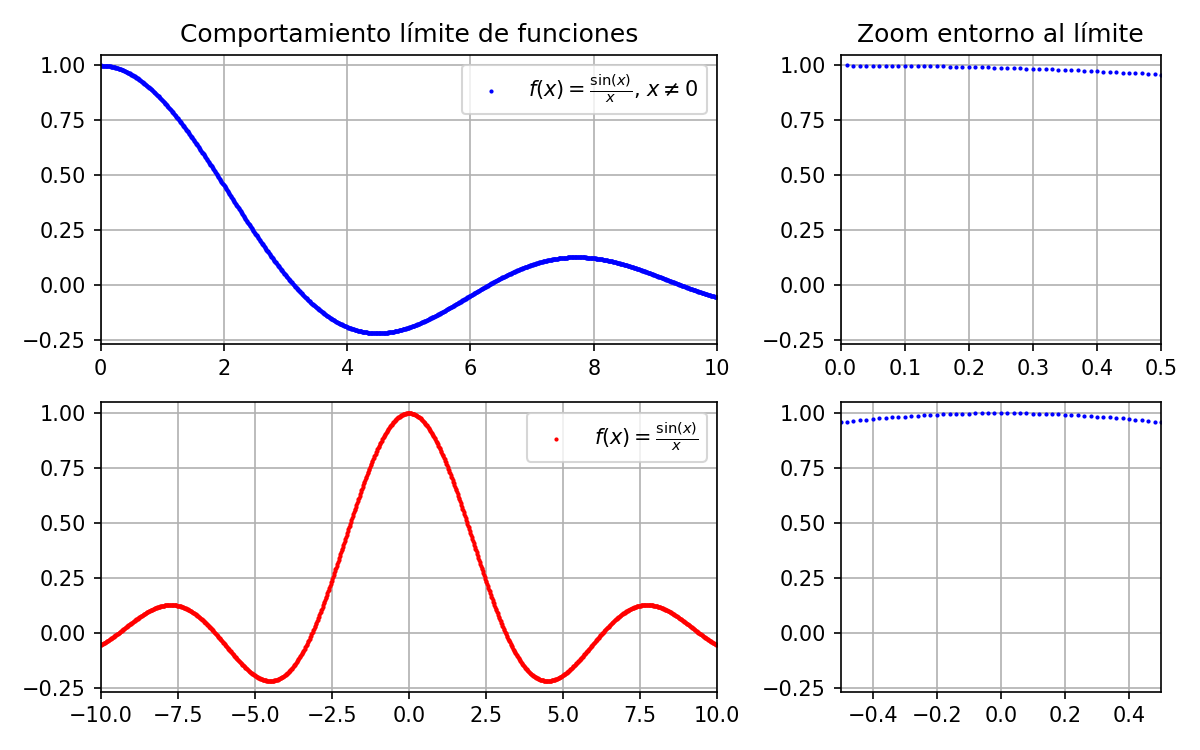

In [44]:
fig3 = plt.figure(figsize=(8, 5))
ax3 = [None for _ in range(4)] 

ax3[0] = plt.subplot2grid((2, 8), (0, 0), colspan=5, fig=fig3)
ax3[0].plot(x, f, linestyle='', marker='.', markersize=2, color='blue', label='$f(x)=\\frac{\sin(x)}{x}$, $x\\neq0$')
ax3[0].set_xlim([0, np.max(x)])
ax3[0].set_ylim([np.min(f) - 0.05, np.max(f) + 0.05])
ax3[0].set_title('Comportamiento límite de funciones')
ax3[0].legend()
ax3[0].grid()

ax3[1] = plt.subplot2grid((2, 8), (0, 5), colspan=3, fig=fig3)
ax3[1].plot(x, f, linestyle='', marker='.', markersize=2, color='blue')
ax3[1].set_xlim([0, 0.5])
ax3[1].set_ylim([np.min(f) - 0.05, np.max(f) + 0.05])
ax3[1].set_title('Zoom entorno al límite')
ax3[1].grid()

ax3[2] = plt.subplot2grid((2, 8), (1, 0), colspan=5, fig=fig3)
ax3[2].plot(x2, f2, linestyle='', marker='.', markersize=2, color='r', label='$f(x)=\\frac{\sin(x)}{x}$')
ax3[2].set_xlim([np.min(x2), np.max(x2)])
ax3[2].set_ylim([np.min(f2) - 0.05, np.max(f2) + 0.05])
ax3[2].legend()
ax3[2].grid()

ax3[3] = plt.subplot2grid((2, 8), (1, 5), colspan=3, fig=fig3)
ax3[3].plot(x2, f2, linestyle='', marker='.', markersize=2, color='blue')
ax3[3].set_xlim([-0.5, 0.5])
ax3[3].set_ylim([np.min(f2) - 0.05, np.max(f2) + 0.05])
ax3[3].grid()

fig3.tight_layout()
plt.show()


In [45]:
# Vemos ahora el caso de una función cuyo límite no existe, aunque quisiéramos darle un valor 
# en la definición que le demos. Veremos que, por más puntos que demos al arreglo cerca de x=0
# nunca habrá un comportamiento coherente

f3 = []
f4 = []

for i in x:
    f3.append(ex.sinc2(i))

for j in x2:
    f4.append(ex.sinc2(j))

f3 = np.asarray(f3)
f4 = np.asarray(f4)

<IPython.core.display.Javascript object>


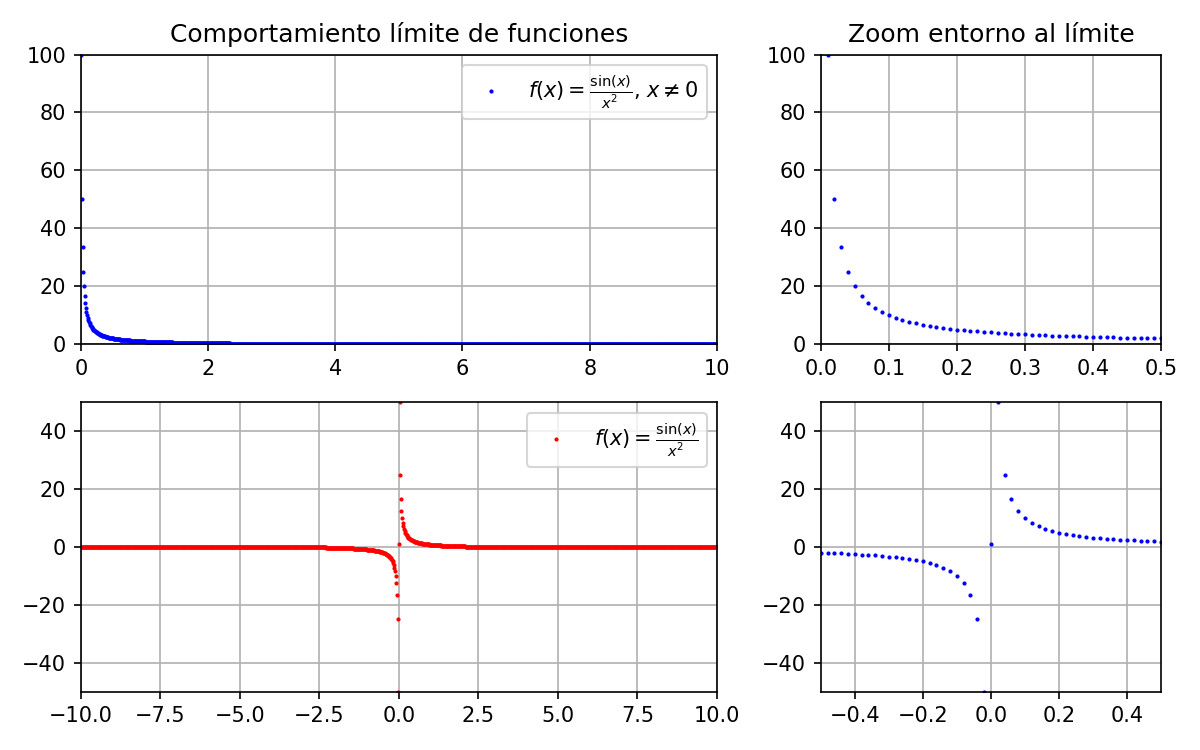

In [47]:
fig4 = plt.figure(figsize=(8, 5))
ax4 = [None for _ in range(4)] 

ax4[0] = plt.subplot2grid((2, 8), (0, 0), colspan=5, fig=fig4)
ax4[0].plot(x, f3, linestyle='', marker='.', markersize=2, color='blue', label='$f(x)=\\frac{\sin(x)}{x^2}$, $x\\neq0$')
ax4[0].set_xlim([0, np.max(x)])
ax4[0].set_ylim([np.min(f3) - 0.05, np.max(f3) + 0.05])
ax4[0].set_title('Comportamiento límite de funciones')
ax4[0].legend()
ax4[0].grid()

ax4[1] = plt.subplot2grid((2, 8), (0, 5), colspan=3, fig=fig4)
ax4[1].plot(x, f3, linestyle='', marker='.', markersize=2, color='blue')
ax4[1].set_xlim([0, 0.5])
ax4[1].set_ylim([np.min(f3) - 0.05, np.max(f3) + 0.05])
ax4[1].set_title('Zoom entorno al límite')
ax4[1].grid()

ax4[2] = plt.subplot2grid((2, 8), (1, 0), colspan=5, fig=fig4)
ax4[2].plot(x2, f4, linestyle='', marker='.', markersize=2, color='r', label='$f(x)=\\frac{\sin(x)}{x^2}$')
ax4[2].set_xlim([np.min(x2), np.max(x2)])
ax4[2].set_ylim([np.min(f4) - 0.05, np.max(f4) + 0.05])
ax4[2].legend()
ax4[2].grid()

ax4[3] = plt.subplot2grid((2, 8), (1, 5), colspan=3, fig=fig4)
ax4[3].plot(x2, f4, linestyle='', marker='.', markersize=2, color='blue')
ax4[3].set_xlim([-0.5, 0.5])
ax4[3].set_ylim([np.min(f4) - 0.05, np.max(f4) + 0.05])
ax4[3].grid()

fig4.tight_layout()
plt.show()


## 2. Continuidad

La continuidad de una función, esquemáticamente, se refiere al hecho de que la curva definida por ésta no dé "saltos", en el sentido de que la curva no está cortada en segmentos. Al respecto, hay términos más complejos implicados, como los límites laterales. Sin embargo, veremos que visualmente es relativamente sencillo tener una idea de la continuidad de una función $f$.

Teniendo en cuenta que los computadores tienen limitaciones evidentes (por ejemplo, no pueden realizar infinitas evaluaciones de una función), podemos sacar ventaja de dichas limitaciones para conformarnos con aproximaciones. Usando los conceptos vistos para límite, podemos tener una idea bastante buena de qué límite tiene, aproximadamente, una función cuando su variable tiende a algún valor.

Siendo más concretos, una función $f$ se dice continua en un punto $x_0$ si $\displaystyle\lim_{x\rightarrow x_0}f(x)$ existe. Si es el caso, dicho límite puede ser denotado por $f(x_0)$. No obstante, un computador puede no poder evaluar de esta forma una función, por lo que la aproximación no sólo es una herramienta suficientemente buena, sino que, en verdad, no tenemos más alternativa.

<IPython.core.display.Javascript object>


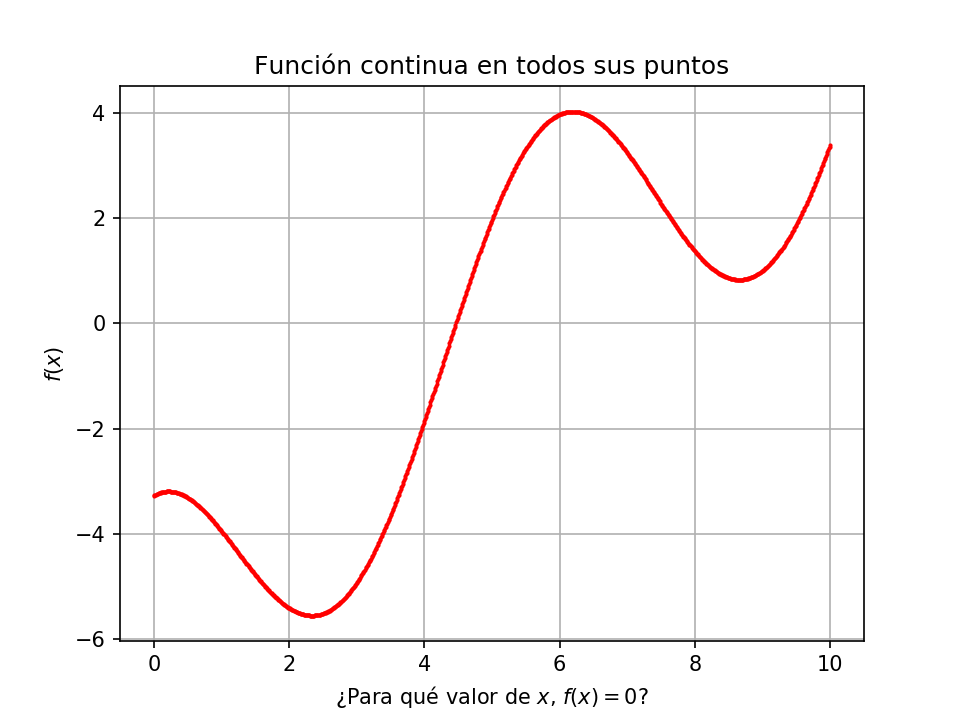

In [74]:
x5 = np.linspace(0, 10, 1001)
f5 = x5 - np.exp(-x5) + 3 * np.sin(x5 + 2) - 5
plt.plot(x5, f5, ls='', marker='.', markersize=2,c='r')
plt.xlabel('¿Para qué valor de $x$, $f(x)=0?$')
plt.ylabel('$f(x)$')
plt.title('Función continua en todos sus puntos')
plt.grid()

Una de las razones por las que es importante saber si una función es continua, aunque sea visualmente, es que eso nos dice si tiene sentido querer resolver cierto tipo de problemas, como por ejemplo, encontrar soluciones a ecuaciones de una variable. Esto ya está planteado en un ejercicio anterior y lo resolveremos en la siguiente clase. Dicho resultado corresponde al **Teorema del Valor Intermedio**.

## Ejercicios

**1.-** Realizar un análisis de algunas sucesiones que usted pueda definir en el módulo *experimento3.py* u otro que usted cree. Se propone las siguientes:

 <ol style="list-style-type:lower-alpha">
  <li>$\qquad a_n = n^pe^{-n},\quad n\ge1,\ p\in\mathbb{R}\quad$ (probar con distintos valores de $p$)$$\\$$</li>

  <li>$\qquad b_n = \sqrt{n}\left[1-\cos\left(\frac{1}{\sqrt[4]{n}}\right)\right],\quad n\ge1$ $$\\$$</li>
    
  <li>$\qquad c_n = 1 + \frac{1}{2^p} + \frac{1}{3^p} + \ldots + \frac{1}{n^p},\quad n\ge1,\ p\in\mathbb{R}\quad$ (probar con distintos valores de $p$)</li>
 </ol> 
 Para quien le interese, la sucesión $\{c_n\}_{n\in\mathbb{N}}$ tiene relación con la función $\zeta$ de Riemann, que es bastante bonita.
 Recuerde que una sucesión sólo puede tomar valores $n\in\mathbb{N}$, por lo que su arreglo de valores no debería incluir valores con decimal; puede asegurarse de ello usando la función 
 
 ```Python
 np.arange(valor1,valor2)
 ```
 
 **2.-** Estudiar la existencia del límite o si hay continuidad en las siguientes funciones. Tendrá que definir una función en el módulo *experimento3.py* u otro que usted cree, ver qué ocurre cuando $x$ se aproxime al valor conflictivo y probar crear una excepción que permita evaluar en el punto conflictivo con el valor del límite, si éste existe.
 
  <ol style="list-style-type:lower-alpha">
  <li>$\qquad f(x) = \frac{\ln(|x|)}{x-1},\quad x>0$ $$\\$$</li>

  <li>$\qquad g(x) = \tan(x)$ $$\\$$</li>
    
  <li>$\qquad h(x) = \begin{cases}
e^{\frac{1}{x^2-1}} & \text{, si }\ \ |x|<1 \\ 
 & \\ 
0 & \text{, si }\ \ |x|\ge1
\end{cases}$</li>
 </ol> 
 
 Si crea una excepción, asegúrese de que el arreglo en que evalúe su función incluya el valor para el que está definida dicha excepción. Puede empezar probando con el arreglo
 ```Python
np.linspace(1.1, 10, 1000)
```
para la función $f(x)$,
 ```Python
np.linspace(0.1, 10, 1000)
```
para la función $g(x)$ y
 ```Python
np.linspace(-0.9, 0.9, 1000)
```
para la función $h(x)$. Luego de definir las excepciones, puede extender dichos arreglos para ver cómo se comportan las funciones.